# **F1 Race**



> This project contains my effort to simulate a kart racing scenary with a really rusty setup that gives us the data scientist the opportuinity to process and visualize the data.

This is no more than a group friends that get to a Karting, the owner is a bit old-fashioned and he computes lap time with a very old device, now he has been upgraded and given an application that keeps all the statistics of the race.

The problem is that his computer is broken and he can't get into the app. You call the supplier and he tells you that real time information is posted when a race starts as it detects that the engine is running. 

You think that's it then, you surf to the ip address where they publish the karts and you realise that the information is far from being pretty. The application was in charge of calculating the lap times, this information that they send only has a timestamp, the kart number and the section of the circuit where it is.

So it's a mess and there's no way of knowing who has won at the end of the race. Luckily, you have your laptop in your backpack so you download the data.  

First you map each kart number to the names and classes of each one on the group,then you start scheming.

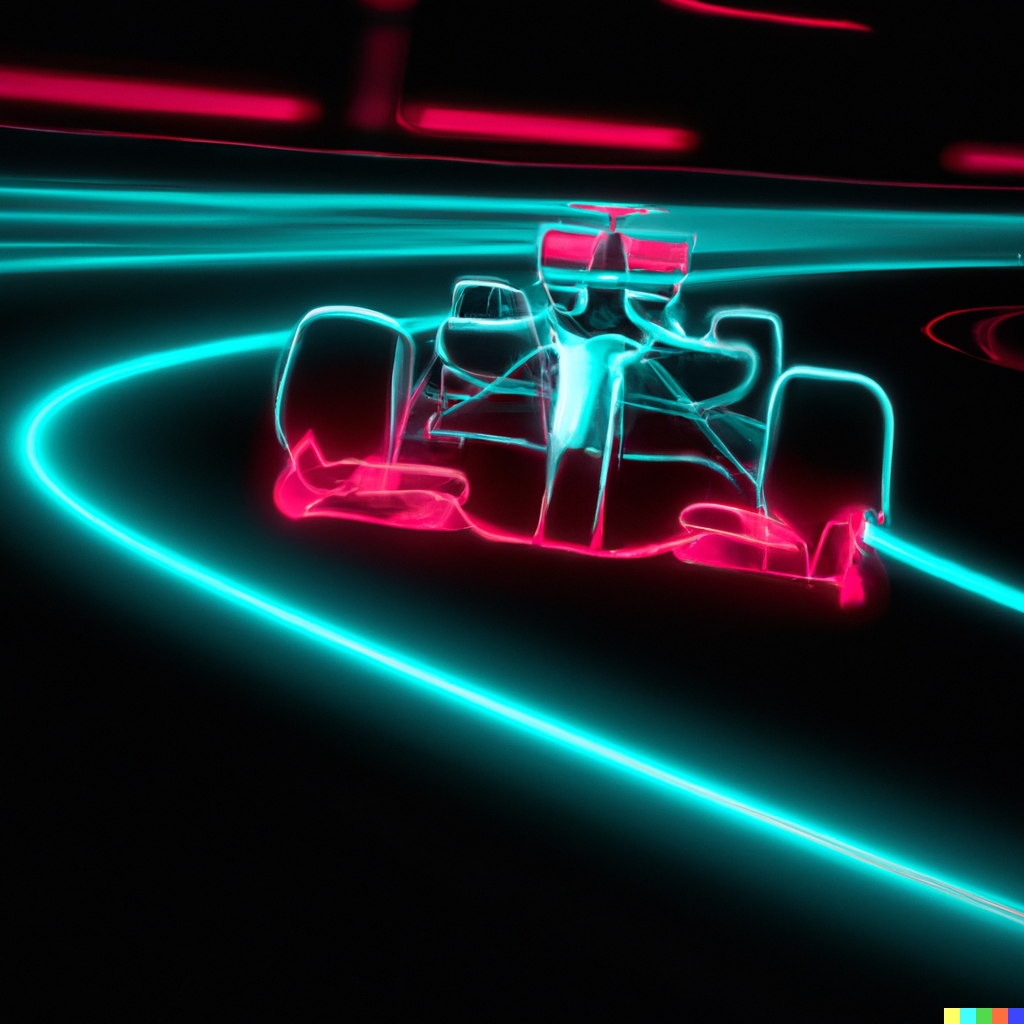

Dall-E Generated

## POLARS
> Polars is the framework I amm going to use in this project, it its similar to pySpark we could consider it its brother.

Polars apply lazy methods to proccess the info applying parallelization. It is written iun Rust and it has become my favorite data handling frameworks for its speed. 

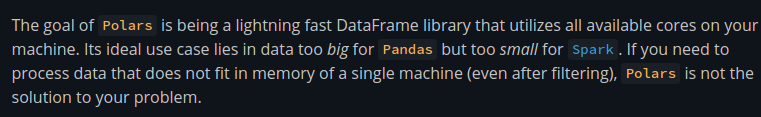

Check benchmarks [Here](https://www.analyticsvidhya.com/blog/2021/06/polars-the-fastest-dataframe-library-youve-never-heard-of/)

## Requirements

In [ ]:
!pip install polars h3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install -U pandas-profiling
!pip show pandas_profiling
#!pip uninstall phik  markupsafe jinja2 missingno PyYAML htmlmin pandas numpy tangled-up-in-unicode tqdm seaborn scipy pydantic multimethod matplotlib requests joblib visions
!pip install phik  markupsafe  jinja2 missingno PyYAML htmlmin pandas numpy tangled-up-in-unicode tqdm seaborn scipy pydantic multimethod matplotlib requests joblib visions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requ

Name: pandas-profiling
Version: 3.2.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: markupsafe, tangled-up-in-unicode, requests, visions, phik, seaborn, pydantic, htmlmin, multimethod, numpy, PyYAML, joblib, jinja2, missingno, tqdm, matplotlib, scipy, pandas
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install visions[type_image_path]==0.7.4
#!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
import polars as pl
import numpy as np
from numpy import arcsin, sqrt, radians as rd
import h3
import pandas as pd
import math
np.random.seed(45)

## The Dataset
> To simulate the data obtained through the web, I will create the dataset , we need 12 riders, 2 riders from each class. 
a real f1 race, the group members have been told to atleast fake 1 stop beetwen lap 5 and 8 , what would make them loss some time.
Sadly, the karts doesnt bring information on this matter, so we can´t recognize when the kart is going to do the pit stop.


In [ ]:
# This is how the classification went
Names = ["Jonan","Pedro C", "Sergio", "Luis", "Mauricio", "Pedro S", "Benito","Adrian","Jorge","Fran","Eduardo","Pablo"]
positions = list(range(12))
Scuderia = ["6B","6A","6C","5A","5B","5C","6B","6A","6C","5A","5B","5C"]

Theres 3 sectors on the race:

[Dall-e Generated](https://labs.openai.com/s/JHiXxOP6bMP4vova3Gqjq2sk)

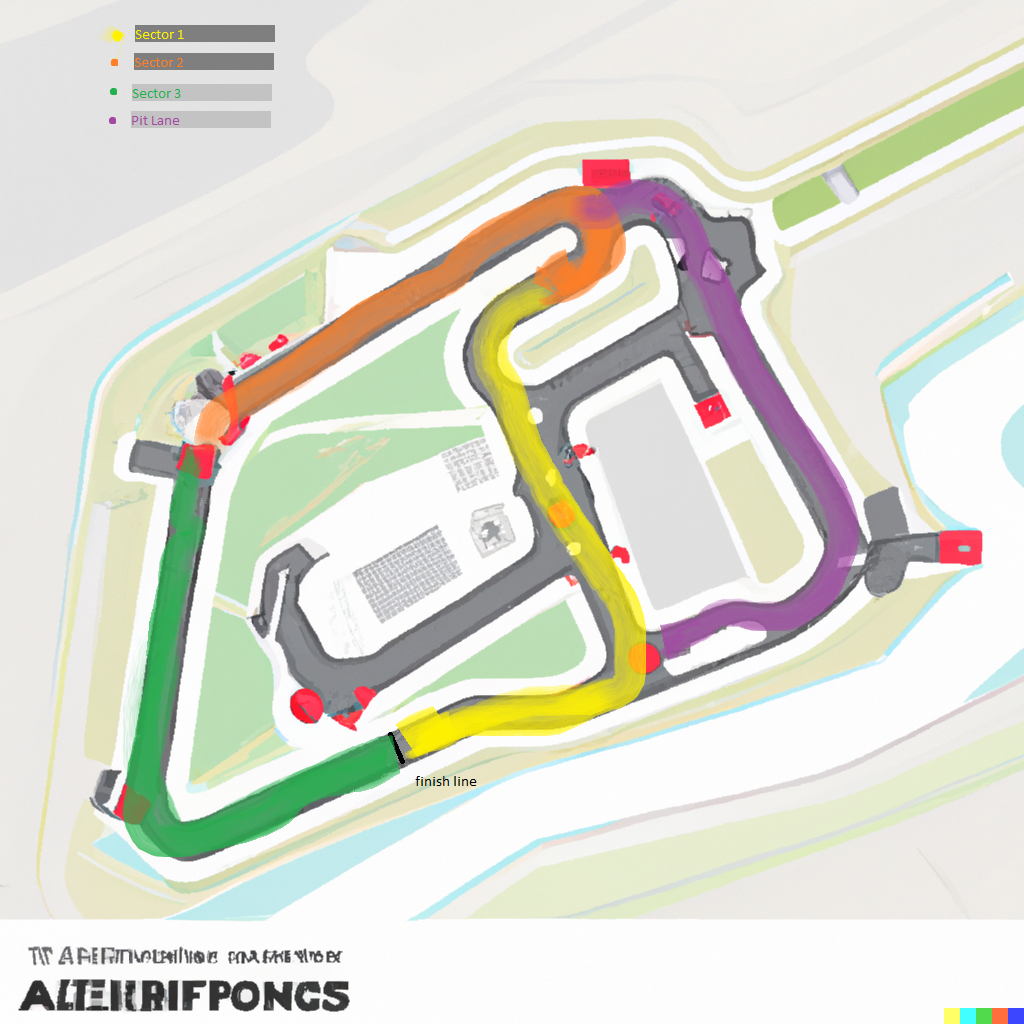

### Timestamps

Dc: To build the timestamps we would suppose that the karts send info about the driver every 1 seconds

As a example this is what a 30 min race would look like with a step of 3 seconds 

In [ ]:
from datetime import datetime as dt , timedelta as td

In [ ]:
pl.date_range(
            low=dt(2021, 12, 16,9,00),
            high=dt(2021, 12, 16, 9, 30),
            interval="3s",
    )

shape: (601,)
Series: '' [datetime[ns]]
[
	2021-12-16 09:00:00
	2021-12-16 09:00:03
	2021-12-16 09:00:06
	2021-12-16 09:00:09
	2021-12-16 09:00:12
	2021-12-16 09:00:15
	2021-12-16 09:00:18
	2021-12-16 09:00:21
	2021-12-16 09:00:24
	2021-12-16 09:00:27
	2021-12-16 09:00:30
	2021-12-16 09:00:33
	...
	2021-12-16 09:29:27
	2021-12-16 09:29:30
	2021-12-16 09:29:33
	2021-12-16 09:29:36
	2021-12-16 09:29:39
	2021-12-16 09:29:42
	2021-12-16 09:29:45
	2021-12-16 09:29:48
	2021-12-16 09:29:51
	2021-12-16 09:29:54
	2021-12-16 09:29:57
	2021-12-16 09:30:00
]

### Sectors


> Sectors will be the main difference in the race, if 1 driver is 1 sector ahead in the same timestamp that means that they're faster.
Lets suppose all drivers have the same probabilty of being ahead, then we would randomly place the drivers.

 We know that the lap time goes from 2 minutes and 3 minutes. Supposing equal time per sector, each sector could take 40 seconds to 1 minute. So it means it randomly placed them from 40 timestamps on the same sector to 60 timestamps in the same sector.

For every lap time would be different and then we would add the time each lap.
We would take into account the classification.

This is only for data creation purposes. Final result could be missleading.

In [ ]:
sections = [1,2,3]
laps = [1,2,3,4,5,6,7,8,9,10]
times_kart = {}
# Names are ordered from first to last in classification
weights = [-35,-30,-25,-20,-15,-10,0,10,15,32,30,35]
for driver in Names:
    for section in sections:
      times_kart[f'{driver}_{section}'] = np.random.randint(40,60,10)

Note that we are only taking into account now the laps separeted by itselfs, we would then add all those accordingly to previous lap.

drivers have to do a fake stop in the the interval lap 5 to lap 8, this fake stop takes 30 seconds, 30 timestamps, we would now compute on which one is the stop for every driver and add timestamps to the second section of that one: 

In [ ]:
classification_position= 0
for driver in Names:
  section=2
  end_section = 3
  pit_stop = np.random.randint(5,8,1)
  times_kart[f'{driver}_{section}'][pit_stop] = times_kart[f'{driver}_{section}'][pit_stop] + 30
  times_kart[f'{driver}_{end_section}'][-1] =  times_kart[f'{driver}_{end_section}'][-1] + weights[classification_position]
  classification_position+=1

now we have something like this:

In [ ]:
times_kart

{'Jonan_1': array([51, 43, 40, 43, 44, 55, 41, 54, 48, 54]),
 'Jonan_2': array([48, 52, 42, 52, 57, 76, 44, 54, 54, 50]),
 'Jonan_3': array([44, 44, 55, 57, 46, 52, 50, 51, 48, 13]),
 'Pedro C_1': array([57, 53, 51, 50, 56, 55, 56, 49, 42, 47]),
 'Pedro C_2': array([40, 56, 51, 58, 49, 58, 40, 76, 40, 48]),
 'Pedro C_3': array([56, 46, 45, 57, 55, 43, 59, 54, 58, 19]),
 'Sergio_1': array([49, 49, 50, 58, 47, 54, 44, 45, 51, 52]),
 'Sergio_2': array([49, 47, 46, 42, 47, 47, 46, 85, 59, 46]),
 'Sergio_3': array([56, 54, 49, 59, 53, 45, 50, 47, 59, 29]),
 'Luis_1': array([41, 56, 58, 51, 41, 51, 49, 52, 58, 53]),
 'Luis_2': array([59, 59, 54, 57, 57, 77, 56, 50, 42, 57]),
 'Luis_3': array([57, 44, 42, 51, 58, 42, 45, 51, 59, 35]),
 'Mauricio_1': array([46, 52, 58, 54, 54, 55, 47, 57, 42, 52]),
 'Mauricio_2': array([47, 49, 46, 44, 51, 83, 44, 45, 44, 41]),
 'Mauricio_3': array([43, 47, 56, 51, 55, 40, 51, 50, 54, 41]),
 'Pedro S_1': array([41, 49, 49, 42, 44, 44, 56, 48, 42, 49]),
 'Pedro

we have now to create a list with all the timestamps, for that we will first create section, we  will do this by creating arrays for each driver with the number of sectors.

In [ ]:
merged_values = np.split(np.concatenate( list(times_kart.values() ), axis=0 ),12)

**Sector Creation**

In [ ]:
total = []
section_rows = []
for num_driver in range(len(merged_values)):
  lap = []
  name = merged_values[num_driver]
  total.append(np.sum(name))
  for i in range(10):
    lap.append(np.concatenate((np.repeat(1,name[i]) , np.repeat(2,name[i+10]) , np.repeat(3,name[i+20]) )))
  section_rows.append(np.concatenate(lap))

**Fast Check**

In [ ]:
sum(merged_values[5])

1477

In [ ]:
len(section_rows[5])

1477

We have now the sections column:

In [ ]:
sections_column = np.concatenate(section_rows)

We also have the name column and the scuderia tanks to totals:

In [ ]:
total

[1462, 1524, 1514, 1562, 1499, 1477, 1551, 1596, 1537, 1527, 1571, 1534]

### Names and Scuderia

In [ ]:
name_rows = []
scuderia_rows = []
for i in range(12):
  name_rows.append(np.repeat(Names[i],total[i]))
  scuderia_rows.append(np.repeat(Scuderia[i],total[i]))
names_column= np.concatenate(name_rows)
scuderia_column= np.concatenate(scuderia_rows)

**Fast Check**

In [ ]:
print(len(scuderia_column) & len(names_column))

18354


thats sooo cool were only left with the time column, for this one, we are going to create series each 1 seconds for totals times.

We will apply the inverse case, calculate with a timestamp of 1 seconds the final date and then create the series.

In [ ]:

timestamp_rows = []
for i in range(12):
  high_time = dt(2021, 12, 16,9,00) + td(seconds= int(total[i]-1)) # if we dont substract 1 it will create 1 instance more per driver because it counts last datetime as a point aswell
  time_driver_series = pl.date_range(
                                    low=dt(2021, 12, 16,9,00),
                                    high=high_time,
                                    interval="1s",
                                    )
  timestamp_rows.append(time_driver_series)
timestamp_column = np.concatenate(timestamp_rows)

**Fast Check**

In [ ]:
print(len(timestamp_column))

18354


## Create the Dataframe
> Let's put everything togheter

In [ ]:
df = pl.DataFrame({
    'driver': pl.Series(names_column),
    'scuderia':pl.Series(scuderia_column),
    'section':pl.Series(sections_column),
    'timestamp':timestamp_column
}).with_columns(pl.col(['driver','scuderia']).str.replace('"','').cast(pl.Utf8)).sort('timestamp')

In [ ]:
df.head()

shape: (5, 4)
┌──────────┬──────────┬─────────┬─────────────────────┐
│ driver   ┆ scuderia ┆ section ┆ timestamp           │
│ ---      ┆ ---      ┆ ---     ┆ ---                 │
│ str      ┆ str      ┆ i64     ┆ datetime[ns]        │
╞══════════╪══════════╪═════════╪═════════════════════╡
│ Jonan    ┆ 6B       ┆ 1       ┆ 2021-12-16 09:00:00 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Pedro C  ┆ 6A       ┆ 1       ┆ 2021-12-16 09:00:00 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Sergio   ┆ 6C       ┆ 1       ┆ 2021-12-16 09:00:00 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Luis     ┆ 5A       ┆ 1       ┆ 2021-12-16 09:00:00 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Mauricio ┆ 5B       ┆ 1       ┆ 2021-12-16 09:00:00 │
└──────────┴──────────┴─────────┴─────────────────────┘

In [ ]:
df.write_csv('f1_race.csv')

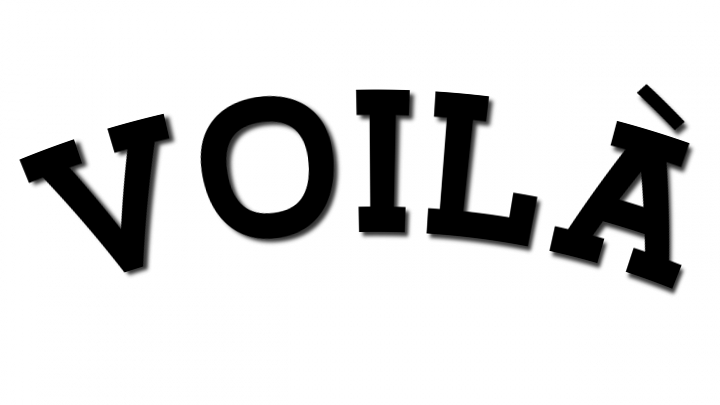

# Fun Part
> Let's now try to obtain the required final df with lap times and winner

## Classification
> Lets add a classification, this is the positions at the start of the race.

In [ ]:
df_quali= pl.DataFrame({
    "position": positions ,
    "driver" : Names,
    "Time quali": [td(seconds=60) + td(seconds=i) for i in range(12)]
})

In [ ]:
df_quali

shape: (12, 3)
┌──────────┬─────────┬─────────────────────┐
│ position ┆ driver  ┆ Time quali          │
│ ---      ┆ ---     ┆ ---                 │
│ i64      ┆ str     ┆ duration[μs]        │
╞══════════╪═════════╪═════════════════════╡
│ 0        ┆ Jonan   ┆ 1 minute            │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 1        ┆ Pedro C ┆ 1 minute 1 second   │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 2        ┆ Sergio  ┆ 1 minute 2 seconds  │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 3        ┆ Luis    ┆ 1 minute 3 seconds  │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ...      ┆ ...     ┆ ...                 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 8        ┆ Jorge   ┆ 1 minute 8 seconds  │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 9        ┆ Fran    ┆ 1 minute 9 seconds  │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 10       ┆ Eduardo ┆ 1 minute 10 seconds │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 11       ┆ Pablo   ┆ 1 minute 11 seconds │
└──────────┴─────────┴─────────────────────┘

## Laps
> first things first, let's find a way to count laps, if i group by Name, there's gonna be a time when section changes from 3 to 1, and then I know I have entered another lap.

We are going to group the datasets, Polars gives us this amazing function _partition by_ that gives us all the datasets grouped by driver.

In [ ]:
drivers_times = df.partition_by("driver", as_dict=True)

if we want to access the dataframes we just have to get the dicts values

In [ ]:
drivers_times.values()

dict_values([shape: (1462, 4)
┌────────┬──────────┬─────────┬─────────────────────┐
│ driver ┆ scuderia ┆ section ┆ timestamp           │
│ ---    ┆ ---      ┆ ---     ┆ ---                 │
│ str    ┆ str      ┆ i64     ┆ datetime[ns]        │
╞════════╪══════════╪═════════╪═════════════════════╡
│ Jonan  ┆ 6B       ┆ 1       ┆ 2021-12-16 09:00:00 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jonan  ┆ 6B       ┆ 1       ┆ 2021-12-16 09:00:01 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jonan  ┆ 6B       ┆ 1       ┆ 2021-12-16 09:00:02 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jonan  ┆ 6B       ┆ 1       ┆ 2021-12-16 09:00:03 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ...    ┆ ...      ┆ ...     ┆ ...                 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jonan  ┆ 6B       ┆ 3       ┆ 2021-12-16 09:24:18 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jonan  ┆ 6B       ┆ 3       ┆ 2021-12-16 09:24:19 

### Pass by Section line
>We filter the dataframe to obtain the changes in section and then we join the changes with the normal dataset and fill forward the lap column so it gets the previous sector value.

In [ ]:
list_laps = []
df_laps = pl.DataFrame()
for driver_df in drivers_times.values():
    changes = driver_df.filter((pl.col("section").diff() < 0) | (pl.col("section").diff() == None ))
    changes = changes.with_column(pl.col("timestamp").rank(method="ordinal").alias("lap"))
    df_lap_driver = driver_df.join(changes, on= "timestamp" , how="outer").sort("timestamp").fill_null(strategy="forward").select(pl.col(["driver","scuderia","lap","section","timestamp"]))
    df_laps = pl.concat([df_laps,df_lap_driver]).sort('timestamp')
changes

shape: (10, 5)
┌────────┬──────────┬─────────┬─────────────────────┬─────┐
│ driver ┆ scuderia ┆ section ┆ timestamp           ┆ lap │
│ ---    ┆ ---      ┆ ---     ┆ ---                 ┆ --- │
│ str    ┆ str      ┆ i64     ┆ datetime[ns]        ┆ u32 │
╞════════╪══════════╪═════════╪═════════════════════╪═════╡
│ Pablo  ┆ 5C       ┆ 1       ┆ 2021-12-16 09:00:00 ┆ 1   │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ Pablo  ┆ 5C       ┆ 1       ┆ 2021-12-16 09:02:20 ┆ 2   │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ Pablo  ┆ 5C       ┆ 1       ┆ 2021-12-16 09:04:33 ┆ 3   │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ Pablo  ┆ 5C       ┆ 1       ┆ 2021-12-16 09:06:51 ┆ 4   │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ ...    ┆ ...      ┆ ...     ┆ ...                 ┆ ... │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ Pablo  ┆ 5C       ┆ 1       ┆ 2021-12-16 09:14:23 ┆ 7   │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ Pablo  ┆ 5C       ┆ 1       ┆ 2021-12-16 09:16:56 ┆ 8   │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ Pablo  ┆ 5C       ┆ 1       ┆ 2021-12-16 09:20:05 ┆ 9   │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┤
│ Pablo  ┆ 5C       ┆ 1       ┆ 2021-12-16 09:22:30 ┆ 10  │
└────────┴──────────┴─────────┴─────────────────────┴─────┘

## Sections and lap time 
>For sections times we just add the time per section filtering by that sector,
total time must be the sum of all the instances in the same lap.


In [ ]:

def section_time(section:int) -> pl.Expr:
  return  pl.col('timestamp').filter(pl.col("section") == section).diff().sum().alias(f"Section {section} Time")

In [ ]:
df_laps = df_laps.lazy().groupby(['driver','scuderia','lap']).agg([
    (pl.col('timestamp').diff().sum()).alias('Lap Time'),
    section_time(1) + td(seconds=1),
    section_time(2) + td(seconds= 1),
    section_time(3),
]).sort("lap").collect()


In [ ]:
df_laps

shape: (120, 7)
┌──────────┬──────────┬─────┬──────────────────────┬────────────┬────────────┬─────────────────────┐
│ driver   ┆ scuderia ┆ lap ┆ Lap Time             ┆ Section 1  ┆ Section 2  ┆ Section 3 Time      │
│ ---      ┆ ---      ┆ --- ┆ ---                  ┆ Time       ┆ Time       ┆ ---                 │
│ str      ┆ str      ┆ u32 ┆ duration[ns]         ┆ ---        ┆ ---        ┆ duration[ns]        │
│          ┆          ┆     ┆                      ┆ duration[n ┆ duration[n ┆                     │
│          ┆          ┆     ┆                      ┆ s]         ┆ s]         ┆                     │
╞══════════╪══════════╪═════╪══════════════════════╪════════════╪════════════╪═════════════════════╡
│ Mauricio ┆ 5B       ┆ 1   ┆ 2 minutes 15 seconds ┆ 46 seconds ┆ 47 seconds ┆ 42 seconds          │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Eduardo  ┆ 5B       ┆ 1   ┆ 2 minutes 25 seconds ┆ 48 seconds ┆ 58 seconds ┆ 39 seconds          │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Adrian   ┆ 6A       ┆ 1   ┆ 2 minutes 41 seconds ┆ 50 seconds ┆ 55 seconds ┆ 56 seconds          │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Fran     ┆ 5A       ┆ 1   ┆ 2 minutes 36 seconds ┆ 56 seconds ┆ 59 seconds ┆ 41 seconds          │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ...      ┆ ...      ┆ ... ┆ ...                  ┆ ...        ┆ ...        ┆ ...                 │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Mauricio ┆ 5B       ┆ 10  ┆ 2 minutes 13 seconds ┆ 52 seconds ┆ 41 seconds ┆ 40 seconds          │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Pedro C  ┆ 6A       ┆ 10  ┆ 1 minute 53 seconds  ┆ 47 seconds ┆ 48 seconds ┆ 18 seconds          │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jorge    ┆ 6C       ┆ 10  ┆ 2 minutes 48 seconds ┆ 54 seconds ┆ 43 seconds ┆ 1 minute 11 seconds │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Adrian   ┆ 6A       ┆ 10  ┆ 2 minutes 57 seconds ┆ 52 seconds ┆ 59 seconds ┆ 1 minute 6 seconds  │
└──────────┴──────────┴─────┴──────────────────────┴────────────┴────────────┴─────────────────────┘

## Fastest Lap !
> We just search for the magical minimun value in lap time

In [ ]:
df_fastest = df_laps.filter(pl.col('Lap Time') == pl.col('Lap Time').min())
fastest_dict = df_fastest.select([pl.col('driver'), pl.col('lap'),pl.col('Lap Time').cast(pl.Time)]).to_dict()

We would plot this later

## Offset per Lap , how distant from median is the driver

I was on a search for a good metric to evaluate the race results, I found in this [Kaggle notebook](https://www.kaggle.com/code/jtrotman/f1-race-traces-2020) a way of calculating the offset per lap that i find inmensily appropiate for this case:

_''A race trace is a way to visualise the progress of an entire Grand Prix, they show gaps between cars and general field spread, as well as the relative pace of each car throughout the race (as line gradient). The traces are calculated from cumulative race lap times, adjusted by the median lap time at that point in the race. You can think of the horizontal zero line as a virtual reference car doing the average lap time of the field, lines above are faster and lower are slower''_


In [ ]:
df_offset = df_laps.groupby(['driver','scuderia']).agg([pl.col(['lap','Lap Time']),pl.col('Lap Time').dt.timestamp().cumsum().alias('cum_time')]).explode(pl.col(['lap','cum_time','Lap Time'])).sort('lap').select([
     pl.col(['driver','scuderia','Lap Time']),
     pl.col('cum_time').cast(pl.Float64),pl.col('lap'), 
     pl.col('cum_time').mean().over('lap').alias('mean_cum_lap')]).with_columns(
         (pl.col('cum_time') - pl.col('mean_cum_lap')).alias('offset') *-1E-9 )

## On the finish Line 🚩🚩( Final Time, best section time, best section, best lap)
> Race time calculated as the sum of all laps, The minimum section time is computed as the min time of the section, Best Sector is computed as the min average time btw the sectors. 

To compare the sectors , we have the wonderful pl.when that gives us the flexibility to throw conditions like theres no tomorrow to the stack.

In [ ]:
def best_sector(n):
  return pl.col(f'Section {n} Time').min().alias(f'Best Sector {n} time')

In [ ]:
def sector_mean(n):
  return pl.col(f'Section {n} Time').mean()

In [ ]:
df_laps.lazy().groupby(['driver','scuderia']).agg(pl.when((sector_mean(1) >= sector_mean(2)) & (sector_mean(1) > sector_mean(3))) \
                                                  .then(pl.lit(1).alias('Best Sector'))\
                                                  .when(sector_mean(2) >= sector_mean(3)) \
                                                  .then(pl.lit(2)) \
                                                  .otherwise(pl.lit(3))).collect()

shape: (12, 3)
┌──────────┬──────────┬─────────────┐
│ driver   ┆ scuderia ┆ Best Sector │
│ ---      ┆ ---      ┆ ---         │
│ str      ┆ str      ┆ i32         │
╞══════════╪══════════╪═════════════╡
│ Mauricio ┆ 5B       ┆ 1           │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Eduardo  ┆ 5B       ┆ 2           │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Pablo    ┆ 5C       ┆ 3           │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jorge    ┆ 6C       ┆ 2           │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ...      ┆ ...      ┆ ...         │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Jonan    ┆ 6B       ┆ 2           │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Sergio   ┆ 6C       ┆ 2           │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Adrian   ┆ 6A       ┆ 2           │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ Luis     ┆ 5A       ┆ 2           │
└──────────┴──────────┴─────────────┘

In [ ]:
df_final = df_laps.lazy().groupby(['driver','scuderia']).agg([
   pl.col('Lap Time').sum().alias('Race Time'),
   pl.col('Lap Time').min().alias('Best Lap'),
   best_sector(1), best_sector(2), best_sector(3),
   pl.when((sector_mean(1) >= sector_mean(2)) & (sector_mean(1) > sector_mean(3))) \
                                                  .then(pl.lit(1).alias('Best Sector'))\
                                                  .when(sector_mean(2) >= sector_mean(3)) \
                                                  .then(pl.lit(2)) \
                                                  .otherwise(pl.lit(3))]).with_column(
       pl.col(['Best Sector 1 time','Best Sector 2 time','Best Sector 3 time']) \
       .min().over('driver').alias('Best Sector time')
        ).sort('Race Time').with_row_count().collect()

Merge and calculate diffenrece with previous position

In [ ]:
df_final =df_final.join(df_quali, on='driver').with_column(-1*(pl.col('row_nr')  - pl.col('position')).alias("gained positions")).rename({"position": "start position", "row_nr":"Position"}).with_columns(
    pl.col(['Position','start position']) + 1).sort("Race Time")

In [ ]:
df_final

shape: (12, 13)
┌─────┬──────────┬─────┬─────────┬─────┬────────────┬────────────┬──────────┬────────────┐
│ Pos ┆ driver   ┆ scu ┆ Race    ┆ ... ┆ Best       ┆ start      ┆ Time     ┆ gained     │
│ iti ┆ ---      ┆ der ┆ Time    ┆     ┆ Sector     ┆ position   ┆ quali    ┆ positions  │
│ on  ┆ str      ┆ ia  ┆ ---     ┆     ┆ time       ┆ ---        ┆ ---      ┆ ---        │
│ --- ┆          ┆ --- ┆ duratio ┆     ┆ ---        ┆ i64        ┆ duration ┆ i64        │
│ u32 ┆          ┆ str ┆ n[ns]   ┆     ┆ duration[n ┆            ┆ [μs]     ┆            │
│     ┆          ┆     ┆         ┆     ┆ s]         ┆            ┆          ┆            │
╞═════╪══════════╪═════╪═════════╪═════╪════════════╪════════════╪══════════╪════════════╡
│ 1   ┆ Jonan    ┆ 6B  ┆ 24      ┆ ... ┆ 12 seconds ┆ 1          ┆ 1 minute ┆ 0          │
│     ┆          ┆     ┆ minutes ┆     ┆            ┆            ┆          ┆            │
│     ┆          ┆     ┆ 12      ┆     ┆            ┆            ┆          ┆            │
│     ┆          ┆     ┆ seconds ┆     ┆            ┆            ┆          ┆            │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 2   ┆ Pedro S  ┆ 5C  ┆ 24      ┆ ... ┆ 39 seconds ┆ 6          ┆ 1 minute ┆ 4          │
│     ┆          ┆     ┆ minutes ┆     ┆            ┆            ┆ 5        ┆            │
│     ┆          ┆     ┆ 27      ┆     ┆            ┆            ┆ seconds  ┆            │
│     ┆          ┆     ┆ seconds ┆     ┆            ┆            ┆          ┆            │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 3   ┆ Mauricio ┆ 5B  ┆ 24      ┆ ... ┆ 39 seconds ┆ 5          ┆ 1 minute ┆ 2          │
│     ┆          ┆     ┆ minutes ┆     ┆            ┆            ┆ 4        ┆            │
│     ┆          ┆     ┆ 49      ┆     ┆            ┆            ┆ seconds  ┆            │
│     ┆          ┆     ┆ seconds ┆     ┆            ┆            ┆          ┆            │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 4   ┆ Sergio   ┆ 6C  ┆ 25      ┆ ... ┆ 28 seconds ┆ 3          ┆ 1 minute ┆ -1         │
│     ┆          ┆     ┆ minutes ┆     ┆            ┆            ┆ 2        ┆            │
│     ┆          ┆     ┆ 4       ┆     ┆            ┆            ┆ seconds  ┆            │
│     ┆          ┆     ┆ seconds ┆     ┆            ┆            ┆          ┆            │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ... ┆ ...      ┆ ... ┆ ...     ┆ ... ┆ ...        ┆ ...        ┆ ...      ┆ ...        │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 9   ┆ Benito   ┆ 6B  ┆ 25      ┆ ... ┆ 40 seconds ┆ 7          ┆ 1 minute ┆ -2         │
│     ┆          ┆     ┆ minutes ┆     ┆            ┆            ┆ 6        ┆            │
│     ┆          ┆     ┆ 41      ┆     ┆            ┆            ┆ seconds  ┆            │
│     ┆          ┆     ┆ seconds ┆     ┆            ┆            ┆          ┆            │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 10  ┆ Luis     ┆ 5A  ┆ 25      ┆ ... ┆ 34 seconds ┆ 4          ┆ 1 minute ┆ -6         │
│     ┆          ┆     ┆ minutes ┆     ┆            ┆            ┆ 3        ┆            │
│     ┆          ┆     ┆ 52      ┆     ┆            ┆            ┆ seconds  ┆            │
│     ┆          ┆     ┆ seconds ┆     ┆            ┆            ┆          ┆            │
├╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 11  ┆ Eduardo  ┆ 5B  ┆ 26      ┆ ... ┆ 39 seconds ┆ 11         ┆ 1 minute ┆ 0          │
│     ┆          ┆     ┆ minutes ┆     ┆            ┆            ┆ 10       ┆            │
│     ┆          ┆     ┆ 1       ┆     ┆            ┆            ┆ seconds  ┆            │
│     ┆          ┆     ┆ second  ┆     ┆            ┆            ┆     

## PitStop of each driver 
> I will use Zscore for detecting outliers, this is no more than the value mino the mean of the group divided by the standard deviation of the group. 

In [ ]:
import scipy.stats as stats

We first obtain a new series containing the value 

In [ ]:
df_pit = pl.from_numpy(stats.zscore(df_laps.select(pl.col('Section 2 Time').cast(pl.Float64)).to_numpy()))

In [ ]:
df_pit = df_laps.hstack(df_pit).rename({'column_0':'zscore'})

I usually use zscore > 2 is an outlier, sometimes 2.5 if its critical for it to appears.

We can see that in this case it suits perfect, those are the outliers, all contained btw 5-8

In [ ]:
df_pit = df_pit.filter(pl.col('zscore') > 2).select(pl.col(['driver','lap'])).rename({"lap": "Pit Lap"})

In [ ]:
df_final = df_final.join(df_pit,on= 'driver').sort('Race Time')

In [ ]:
pandas_df = df_final.to_pandas().set_index("Position")

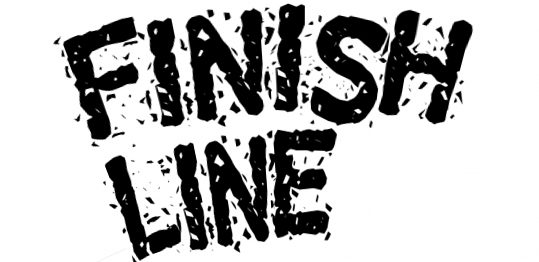

# Visualizing Results

First thing is clear the timedelta object, in Pandas it automatically converts to days hour minute seconds we just want minute seconds for the ocasion. Then we display the result df. The table of winners.

In [ ]:
list(pandas_df.select_dtypes(include=['timedelta']).columns)

['Race Time',
 'Best Lap',
 'Best Sector 1 time',
 'Best Sector 2 time',
 'Best Sector 3 time',
 'Best Sector time',
 'Time quali']

In [ ]:
def convertNanos(nanos):
    seconds=(nanos/1E9)%60
    minutes=(nanos/(1E9*60))%60
    return f'{math.floor(minutes)}:{math.floor(seconds)}'

In [ ]:
from IPython.display import display, HTML
def substract_days(column:str):
  pandas_df[column] = pandas_df[column].astype(str).map(lambda x: x[10:])
for column in list(pandas_df.select_dtypes(include=['timedelta']).columns): 
  substract_days(column)
display(HTML(pandas_df.to_html()))

## Race Tracking

Finally, A Graphic implementation to check some insights we may have miss 

In [ ]:
import pandas as pd

In [ ]:
import plotly.express as px
pandas_laps['sum'] = df_offset.to_pandas().groupby(['driver','scuderia'])['Lap Time'].apply(
    lambda x: x.fillna(pd.Timedelta(seconds=0)).cumsum()/1000000000)
px.line(pandas_laps, y="sum", x="lap", color="driver" ,labels=dict(lap="Lap", offset="Total Race Seconds", driver="Drivers"), title= " Race Times by lap and driver 🏎️ , 🔥 simbolizes the fastest Lap")


This doesnt really help us see the outcome, we are going to extract time delta, this is the difference with median time per lap, this way , we will really appreciate the changes.

Lets look for our best lap boy, we know the name is Pedro C, so we will find the line ( dic ) and extract that color to implemented it in the best lap annotation.

In [ ]:
Fast_lap_index = next((index for (index, d) in enumerate(fig.data) if d["name"] == fastest_dict['driver'][0]), None)
Fast_lap_index

6

In [ ]:
fig = px.line(df_offset.to_pandas(), y="offset", x="lap", color="driver", labels=dict(lap="Lap", offset="Offset (Seconds)", driver="Drivers"), title= " Offset Times by lap and driver 🏎️ , 🔥 simbolizes the fastest Lap")
fig.add_annotation(
        x=10,
        y=5.5,
        xref="x",
        yref="y",
        text="🔥",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="left",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=-55,
        ay=-30,
        bordercolor=fig.data[11]['line']['color'],
        borderwidth=2,
        borderpad=4,
       # bgcolor="#ff7f0e",
        opacity=0.8
        ),
fig.add_annotation(
        x=4,
        y=60,
        xref="x",
        yref="y",
        text=f"Fastest Lap: {convertNanos(fastest_dict['Lap Time'][0])} driver: {fastest_dict['driver'][0]} in lap {fastest_dict['lap'][0]}",
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#613737"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=0,
        ay=0,
        bordercolor=fig.data[Fast_lap_index]['line']['color'],
        borderwidth=5,
        borderpad=3,
        # bgcolor="#ff7f0e",
        opacity=0.8
        )

# Summary

This colab was made more to put in context how manageable is Polars in opposition to Pandas. It was a little playground to show its powers.

First we created a mock dataset. Although I tried to get decent samples applying the law of minimum effort, data are not really reliable but we would take them as valid for the project.  

Resolution was even easier than creating the dataset and it makes total sense because I know the reverse steps to extract the information 😞.
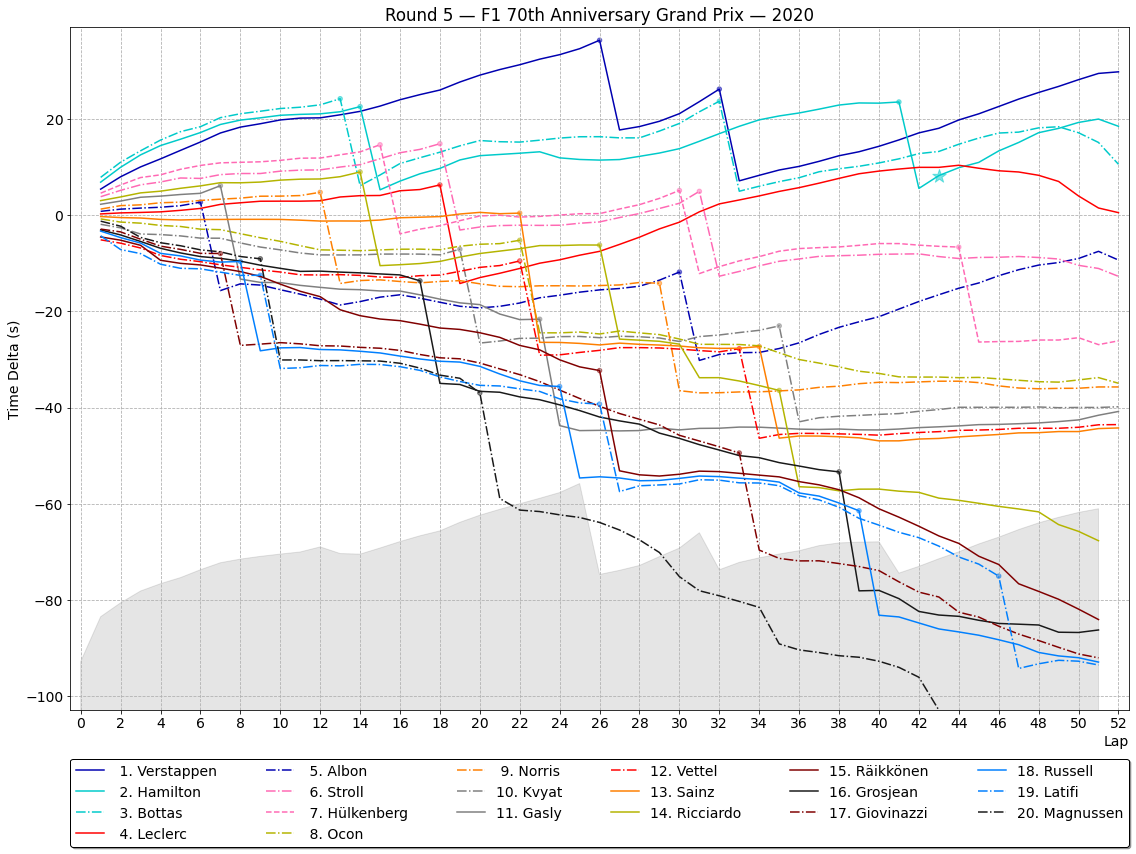


The previous graph has been obtained from a [kaggle notebook](https://www.kaggle.com/code/jtrotman/f1-race-traces-2020) on a real race, we can clearly see the same pattern as it start to distant itself in time as more laps they have. 

Their offset doesnt really go off until a certain amount of laps but these guys are so good that know the circuit by head and its weird that on the first laps they dont nail the time.
Looking at the graphs, 

This makes mucho more sense, Its true that we won't see a clear pattern as in real races, but it is curious to note how the Offset starts to expand and take up more space on the graph from lap 5 onwards, which is where the stops have started.

In addition, the fastest lap was done by Pedro C, and he managed to gain a few places just before reaching the finish line, what a beautiful command that must've been !! I wish I'd been there !! 🏎️🏎️🏎️🏎️

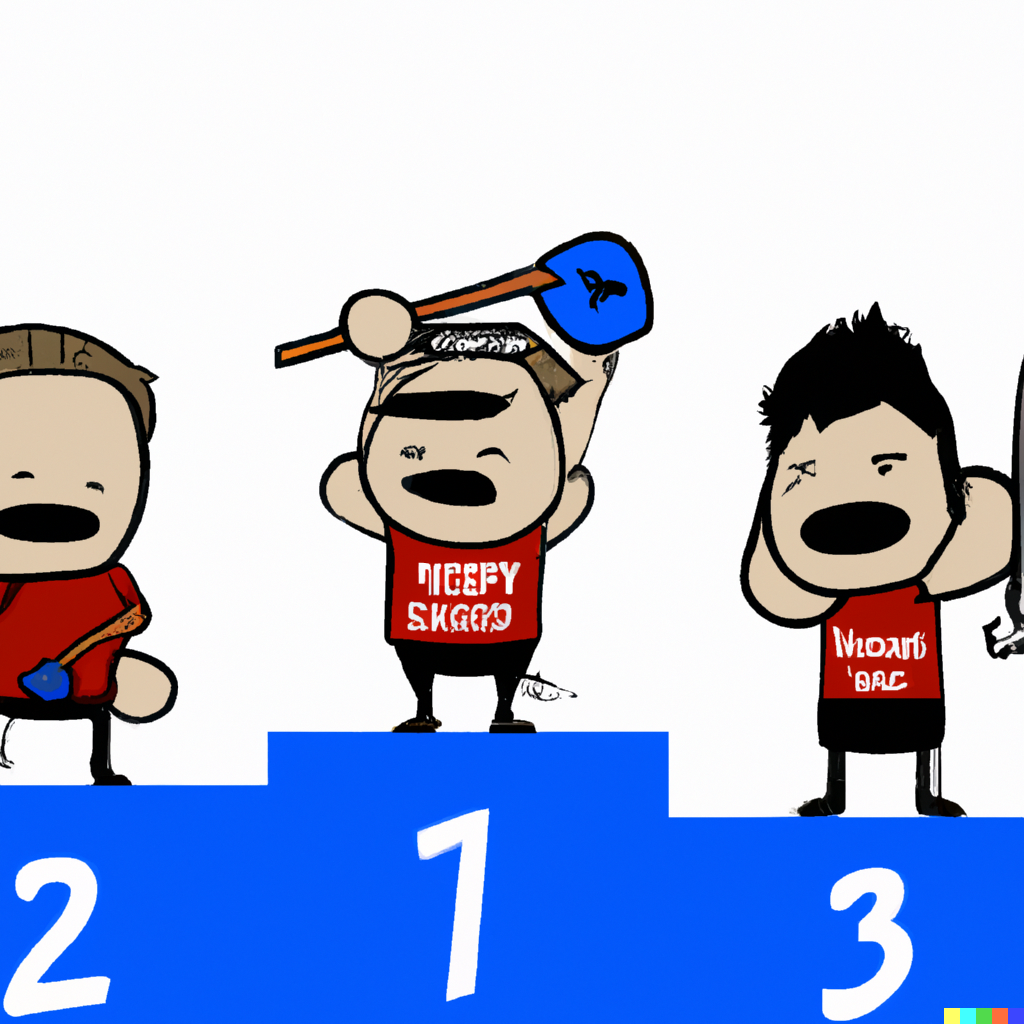

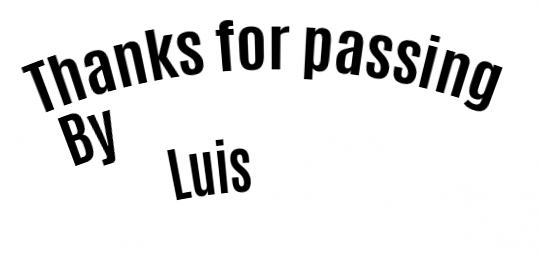